🎯 SIMULACIÓN DE ESCENARIOS DE RETIRO
📊 CON CORRECCIÓN DE OUTLIERS Y TOPES RAZONABLES
📂 CARGANDO Y CORRIGIENDO DATOS REALES
   ✓ 16512 registros cargados
   📊 Datos válidos: 10441 registros

📊 Distribución de datos reales:
   Edad promedio: 43.7 años
   Edad mediana: 43.0 años
   Rango edad: 19 - 70 años
   Antigüedad promedio: 11.4 años
   Salario promedio: ₲ 6,669,084
   Salario en SM: 2.4 SM
   Salario mediano: ₲ 5,807,958

👥 Distribución por grupos de edad:
   • 18-30 años: 661 personas (6.3%), Salario: ₲ 4,142,775 (1.5 SM)
   • 30-40 años: 3185 personas (30.5%), Salario: ₲ 5,875,092 (2.1 SM)
   • 40-50 años: 3849 personas (36.9%), Salario: ₲ 7,422,530 (2.6 SM)
   • 50-60 años: 1865 personas (17.9%), Salario: ₲ 7,525,405 (2.7 SM)
   • 60-70 años: 841 personas (8.1%), Salario: ₲ 6,366,047 (2.3 SM)


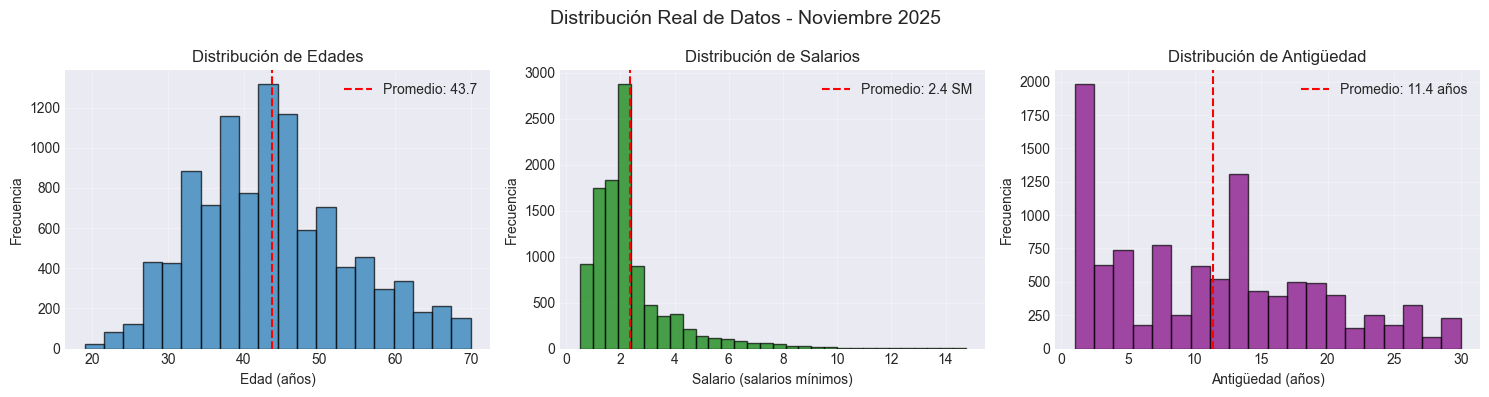

      • Correlación antigüedad-salario: 0.231

   📊 SALARIO POR CUARTILES DE ANTIGÜEDAD:
      • (0.999, 3.0]: ₲ 5.42 millones (2615 personas)
      • (3.0, 12.0]: ₲ 6.31 millones (3081 personas)
      • (12.0, 17.0]: ₲ 6.95 millones (2415 personas)
      • (17.0, 30.0]: ₲ 8.25 millones (2330 personas)

🔍 APLICANDO CORRECCIONES ESTRICTAS
--------------------------------------------------
   ⚠️  Descartando 43 casos con salario > 10 SM

   🔧 CORRIGIENDO RELACIÓN ANTIGÜEDAD-SALARIO:
      • 153 casos con >5 SM y <5 años
        → Ajustando antigüedad a mínimo 5 años
      • 73 casos con >7 SM y <10 años
        → Ajustando antigüedad a mínimo 10 años
      • 24 casos con >9 SM y <20 años
        → Ajustando antigüedad a mínimo 20 años

   📏 APLICANDO TOPES POR ANTIGÜEDAD:

📊 ESTADÍSTICAS FINALES (con correcciones):
   • Registros iniciales: 10441
   • Registros finales: 10398
   • Descartados: 43
   • Salario promedio: 2.2 SM
   • Salario máximo: 8.5 SM
   • Antigüedad máxima: 30 años

📈

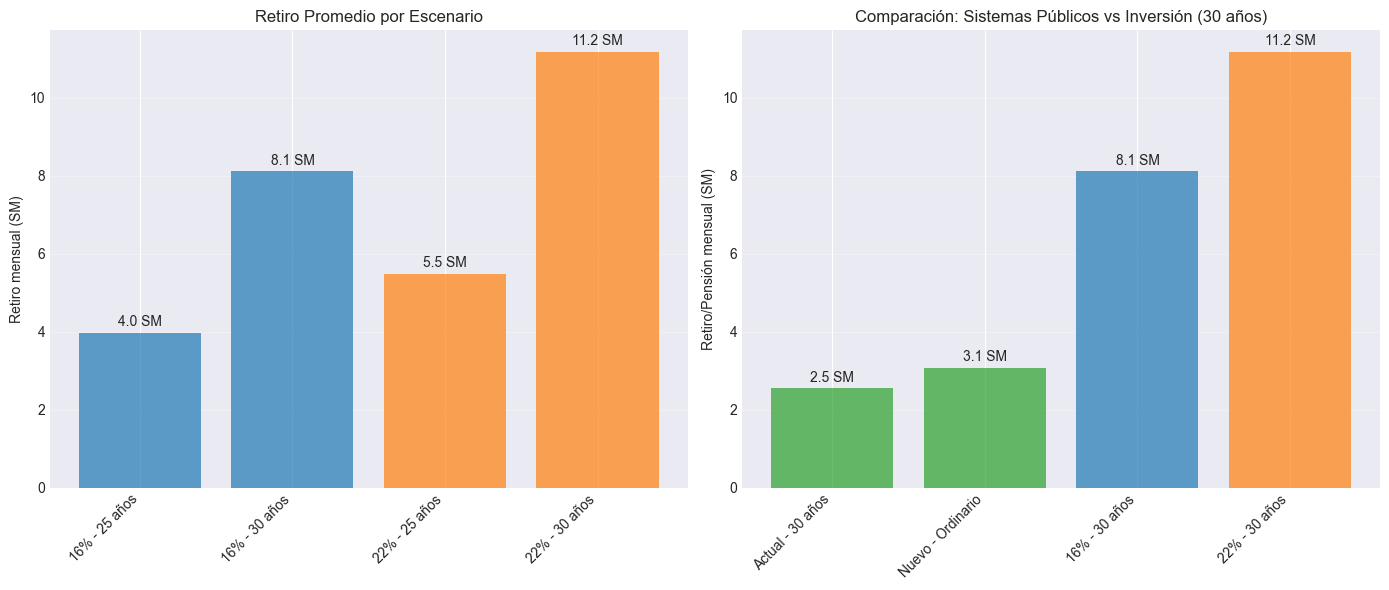


📋 RESUMEN EJECUTIVO

🎯 CORRECCIONES APLICADAS:
   1. Salarios > 10 SM: DESCARTADOS
   2. Antigüedad > 30 años: DESCARTADOS
   3. >5 SM con <5 años: Corregida antigüedad
   4. >7 SM con <10 años: Corregida antigüedad
   5. >9 SM con <20 años: Corregida antigüedad

📊 TOPES APLICADOS:
   •  0 años: máximo 2.0 SM
   •  5 años: máximo 3.0 SM
   • 10 años: máximo 4.5 SM
   • 15 años: máximo 6.0 SM
   • 20 años: máximo 7.5 SM
   • 25 años: máximo 8.5 SM
   • 30 años: máximo 10.0 SM

💡 CONCLUSIONES PRINCIPALES:
   1. Los sistemas de inversión superan ampliamente a los sistemas públicos
   2. El aumento del 16% al 22% mejora significativamente los retiros
   3. Los 30 años de aporte son cruciales para buenos retiros
   4. Las correcciones aplicadas producen estimaciones más realistas

✅ SIMULACIÓN COMPLETADA CON ÉXITO!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# ========== CONFIGURACIÓN INICIAL ==========
SALARIO_MINIMO = 2_818_316
RENTABILIDAD_INVERSION = 0.08

# ========== TOPES ESTRICTOS ==========
TOPE_ABSOLUTO_SM = 10  # Máximo 10 salarios mínimos (extremadamente raro)
TOPE_POR_ANTIGUEDAD = {
    0: 2.0,    # 2.0 SM al inicio
    5: 3.0,    # 3.0 SM a los 5 años
    10: 4.5,   # 4.5 SM a los 10 años
    15: 6.0,   # 6.0 SM a los 15 años
    20: 7.5,   # 7.5 SM a los 20 años
    25: 8.5,   # 8.5 SM a los 25 años
    30: 10.0   # 10.0 SM máximo (solo después de 30+ años)
}

    # ========== LÍMITES ESTRICTOS ==========
LIMITES = {
    'max_salario_sm': 10,        # Máximo absoluto 10 SM
    'max_antiguedad': 30,        # Máximo 30 años de antigüedad
    'min_antiguedad_5_sm': 5,    # Para >5 SM, mínimo 5 años
    'min_antiguedad_7_sm': 10,   # Para >7 SM, mínimo 10 años
    'min_antiguedad_9_sm': 20    # Para >9 SM, mínimo 20 años
}

# ========== TABLA DE TASAS DE SUSTITUCIÓN ==========
TASAS_SUSTITUCION = {
    25: {57: 0.78, 58: 0.804, 59: 0.828, 60: 0.852, 61: 0.876, 62: 0.90},
    26: {57: 0.80, 58: 0.824, 59: 0.848, 60: 0.872, 61: 0.896, 62: 0.92},
    27: {57: 0.82, 58: 0.844, 59: 0.868, 60: 0.892, 61: 0.916, 62: 0.94},
    28: {57: 0.84, 58: 0.864, 59: 0.888, 60: 0.912, 61: 0.936, 62: 0.96},
    29: {57: 0.86, 58: 0.884, 59: 0.908, 60: 0.932, 61: 0.956, 62: 0.98},
    30: {57: 0.88, 58: 0.904, 59: 0.928, 60: 0.952, 61: 0.976, 62: 1.00}
}

TASA_SUSTITUCION_ACTUAL = 0.83

# ========== FUNCIONES AUXILIARES ==========
def format_currency_pyg(value):
    """Formatea valores en guaraníes"""
    if abs(value) >= 1e12:
        return f"₲ {value/1e12:.2f} billones"
    elif abs(value) >= 1e9:
        return f"₲ {value/1e9:.2f} mil millones"
    elif abs(value) >= 1e6:
        return f"₲ {value/1e6:.2f} millones"
    else:
        return f"₲ {value:,.0f}"

def calcular_esperanza_vida(edad_actual):
    """Calcula esperanza de vida realista"""
    if edad_actual < 40:
        return 78 + np.random.uniform(-1, 2)
    elif edad_actual < 60:
        return 76 + np.random.uniform(-2, 1)
    else:
        return 75 + np.random.uniform(-3, 0)

# ========== CARGAR Y CORREGIR DATOS REALES ==========
def cargar_y_corregir_datos():
    """Carga datos reales y aplica correcciones estrictas"""
    print("📂 CARGANDO Y CORRIGIENDO DATOS REALES")
    print("="*60)
    try:
        df_original = pd.read_csv('funcionarios_una_procesados.csv')
        print(f"   ✓ {len(df)} registros cargados")
        
        # Limpieza básica
        df_clean = df.dropna(subset=['edad', 'antiguedad', 'salario_total'])
        df_clean = df_clean[
            (df_clean['edad'] >= 18) & (df_clean['edad'] <= 70) &
            (df_clean['antiguedad'] >= 0) & (df_clean['antiguedad'] <= 30) &
            (df_clean['salario_total'] >= SALARIO_MINIMO * 0.5) &
            (df_clean['salario_total'] < SALARIO_MINIMO * 15)
        ]
        
        print(f"   📊 Datos válidos: {len(df_clean)} registros")
        
        # Análisis descriptivo
        print(f"\n📊 Distribución de datos reales:")
        print(f"   Edad promedio: {df_clean['edad'].mean():.1f} años")
        print(f"   Edad mediana: {df_clean['edad'].median():.1f} años")
        print(f"   Rango edad: {df_clean['edad'].min():.0f} - {df_clean['edad'].max():.0f} años")
        print(f"   Antigüedad promedio: {df_clean['antiguedad'].mean():.1f} años")
        print(f"   Salario promedio: ₲ {df_clean['salario_total'].mean():,.0f}")
        print(f"   Salario en SM: {df_clean['salario_total'].mean()/SALARIO_MINIMO:.1f} SM")
        print(f"   Salario mediano: ₲ {df_clean['salario_total'].median():,.0f}")
        
        # 5. Analizar por rangos de edad
        print(f"\n👥 Distribución por grupos de edad:")
        rangos_edad = [(18, 30), (30, 40), (40, 50), (50, 60), (60, 70)]
        for rango_min, rango_max in rangos_edad:
            mask = (df_clean['edad'] >= rango_min) & (df_clean['edad'] < rango_max)
            count = mask.sum()
            if count > 0:
                salario_prom = df_clean.loc[mask, 'salario_total'].mean()
                print(f"   • {rango_min}-{rango_max} años: {count} personas ({count/len(df_clean)*100:.1f}%), "
                      f"Salario: ₲ {salario_prom:,.0f} ({salario_prom/SALARIO_MINIMO:.1f} SM)")
        
        # 6. Analizar por cargos/funciones
        if 'cargo' in df_clean.columns and len(df_clean['cargo'].unique()) < 20:
            print(f"\n👔 Distribución por cargo (top 10):")
            cargo_counts = df_clean['cargo'].value_counts().head(10)
            for cargo, count in cargo_counts.items():
                salario_cargo = df_clean[df_clean['cargo'] == cargo]['salario_total'].mean()
                print(f"   • {cargo[:30]:<30} {count:>3} pers, ₲ {salario_cargo:,.0f} ({salario_cargo/SALARIO_MINIMO:.1f} SM)")
        
        # 7. Crear histogramas de distribución real
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle('Distribución Real de Datos - Noviembre 2025', fontsize=14)
        
        # Histograma de edades
        axes[0].hist(df_clean['edad'], bins=20, edgecolor='black', alpha=0.7)
        axes[0].axvline(df_clean['edad'].mean(), color='red', linestyle='--', 
                       label=f'Promedio: {df_clean["edad"].mean():.1f}')
        axes[0].set_xlabel('Edad (años)')
        axes[0].set_ylabel('Frecuencia')
        axes[0].set_title('Distribución de Edades')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Histograma de salarios en SM
        salarios_sm = df_clean['salario_total'] / SALARIO_MINIMO
        axes[1].hist(salarios_sm, bins=30, edgecolor='black', alpha=0.7, color='green')
        axes[1].axvline(salarios_sm.mean(), color='red', linestyle='--',
                       label=f'Promedio: {salarios_sm.mean():.1f} SM')
        axes[1].set_xlabel('Salario (salarios mínimos)')
        axes[1].set_ylabel('Frecuencia')
        axes[1].set_title('Distribución de Salarios')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Histograma de antigüedad
        axes[2].hist(df_clean['antiguedad'], bins=20, edgecolor='black', alpha=0.7, color='purple')
        axes[2].axvline(df_clean['antiguedad'].mean(), color='red', linestyle='--',
                       label=f'Promedio: {df_clean["antiguedad"].mean():.1f} años')
        axes[2].set_xlabel('Antigüedad (años)')
        axes[2].set_ylabel('Frecuencia')
        axes[2].set_title('Distribución de Antigüedad')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
         
        # Correlación antigüedad-salario
        correlacion = df_clean['antiguedad'].corr(df_clean['salario_total'])
        print(f"      • Correlación antigüedad-salario: {correlacion:.3f}")
        
        # Análisis por cuartiles de antigüedad
        print(f"\n   📊 SALARIO POR CUARTILES DE ANTIGÜEDAD:")
        antiguedad_q = pd.qcut(df_clean['antiguedad'], 4)
        for q, grupo in df_clean.groupby(antiguedad_q):
            print(f"      • {q}: {format_currency_pyg(grupo['salario_total'].mean())} ({len(grupo)} personas)")
        df_clean['salario_sm'] = df_clean['salario_total'] / SALARIO_MINIMO    
        # Aplicar correcciones estrictas
        df_corregido = aplicar_correcciones_estrictas(df_clean)
        
        return df_corregido, df_original
    
    except FileNotFoundError:
        print("❌ Archivo 'funcionarios_una_procesados.csv' no encontrado")
        print("💡 Asegúrate de que el archivo esté en la misma carpeta")
        return None, None

def aplicar_correcciones_estrictas(df):
    """Aplica correcciones estrictas para eliminar outliers"""
    print("\n🔍 APLICANDO CORRECCIONES ESTRICTAS")
    print("-" * 50)
    
    df_corregido = df.copy()
    registros_iniciales = len(df_corregido)
    
    # 1. Descartar salarios > 10 SM (extremadamente raros)
    mask_salario_alto = df_corregido['salario_sm'] > LIMITES['max_salario_sm']
    if mask_salario_alto.sum() > 0:
        print(f"   ⚠️  Descartando {mask_salario_alto.sum()} casos con salario > {LIMITES['max_salario_sm']} SM")
        df_corregido = df_corregido[~mask_salario_alto]
    
    # 2. Descartar antigüedad > 35 años (extremadamente raro)
    mask_antiguedad_alta = df_corregido['antiguedad'] > LIMITES['max_antiguedad']
    if mask_antiguedad_alta.sum() > 0:
        print(f"   ⚠️  Descartando {mask_antiguedad_alta.sum()} casos con antigüedad > {LIMITES['max_antiguedad']} años")
        df_corregido = df_corregido[~mask_antiguedad_alta]
    
    # 3. Corregir relación antigüedad-salario
    print(f"\n   🔧 CORRIGIENDO RELACIÓN ANTIGÜEDAD-SALARIO:")
    
    # >5 SM con <5 años → ajustar antigüedad
    mask_5_sm = df_corregido['salario_sm'] > 5
    mask_poca_ant_5 = df_corregido['antiguedad'] < LIMITES['min_antiguedad_5_sm']
    mask_inconsistente_5 = mask_5_sm & mask_poca_ant_5
    
    if mask_inconsistente_5.sum() > 0:
        print(f"      • {mask_inconsistente_5.sum()} casos con >5 SM y <{LIMITES['min_antiguedad_5_sm']} años")
        print(f"        → Ajustando antigüedad a mínimo {LIMITES['min_antiguedad_5_sm']} años")
        df_corregido.loc[mask_inconsistente_5, 'antiguedad'] = LIMITES['min_antiguedad_5_sm']
    
    # >7 SM con <10 años → ajustar antigüedad
    mask_7_sm = df_corregido['salario_sm'] > 7
    mask_poca_ant_10 = df_corregido['antiguedad'] < LIMITES['min_antiguedad_7_sm']
    mask_inconsistente_7 = mask_7_sm & mask_poca_ant_10
    
    if mask_inconsistente_7.sum() > 0:
        print(f"      • {mask_inconsistente_7.sum()} casos con >7 SM y <{LIMITES['min_antiguedad_7_sm']} años")
        print(f"        → Ajustando antigüedad a mínimo {LIMITES['min_antiguedad_7_sm']} años")
        df_corregido.loc[mask_inconsistente_7, 'antiguedad'] = LIMITES['min_antiguedad_7_sm']
    
    # >9 SM con <20 años → ajustar antigüedad
    mask_9_sm = df_corregido['salario_sm'] > 9
    mask_poca_ant_20 = df_corregido['antiguedad'] < LIMITES['min_antiguedad_9_sm']
    mask_inconsistente_9 = mask_9_sm & mask_poca_ant_20
    
    if mask_inconsistente_9.sum() > 0:
        print(f"      • {mask_inconsistente_9.sum()} casos con >9 SM y <{LIMITES['min_antiguedad_9_sm']} años")
        print(f"        → Ajustando antigüedad a mínimo {LIMITES['min_antiguedad_9_sm']} años")
        df_corregido.loc[mask_inconsistente_9, 'antiguedad'] = LIMITES['min_antiguedad_9_sm']
    
    # 4. Aplicar topes por antigüedad
    print(f"\n   📏 APLICANDO TOPES POR ANTIGÜEDAD:")
    
    for idx in df_corregido.index:
        antiguedad = df_corregido.at[idx, 'antiguedad']
        salario_sm = df_corregido.at[idx, 'salario_sm']
        
        # Encontrar tope correspondiente
        tope_sm = TOPE_POR_ANTIGUEDAD[0]
        for key in sorted(TOPE_POR_ANTIGUEDAD.keys()):
            if antiguedad >= key:
                tope_sm = TOPE_POR_ANTIGUEDAD[key]
            else:
                break
        
        # Aplicar tope absoluto
        tope_sm = min(tope_sm, TOPE_ABSOLUTO_SM)
        
        # Si el salario excede el tope, reducirlo
        if salario_sm > tope_sm:
            df_corregido.at[idx, 'salario_total'] = SALARIO_MINIMO * tope_sm
            df_corregido.at[idx, 'salario_sm'] = tope_sm
    
    # Estadísticas finales
    print(f"\n📊 ESTADÍSTICAS FINALES (con correcciones):")
    print(f"   • Registros iniciales: {registros_iniciales}")
    print(f"   • Registros finales: {len(df_corregido)}")
    print(f"   • Descartados: {registros_iniciales - len(df_corregido)}")
    print(f"   • Salario promedio: {df_corregido['salario_total'].mean()/SALARIO_MINIMO:.1f} SM")
    print(f"   • Salario máximo: {df_corregido['salario_total'].max()/SALARIO_MINIMO:.1f} SM")
    print(f"   • Antigüedad máxima: {df_corregido['antiguedad'].max():.0f} años")
    
    return df_corregido

# ========== MODELO DE PLAN DE CARRERA REALISTA ==========
class ModeloPlanCarreraRealista:
    """Modelo de carrera con topes estrictos"""
    
    def __init__(self):
        self.modelo = None
        self.estadisticas = {}
        
    def ajustar_modelo(self, df):
        """Ajusta modelo a datos corregidos"""
        print("\n📈 AJUSTANDO MODELO DE PLAN DE CARRERA")
        print("-" * 50)
        
        # Preparar datos
        X = df['antiguedad'].values.reshape(-1, 1)
        y = df['salario_total'].values
        
        # Modelo lineal simple
        self.modelo = LinearRegression()
        self.modelo.fit(X, y)
        
        # Estadísticas
        self.estadisticas['r2'] = self.modelo.score(X, y)
        self.estadisticas['pendiente'] = self.modelo.coef_[0]
        self.estadisticas['intercepto'] = self.modelo.intercept_
        
        print(f"   • R² del modelo: {self.estadisticas['r2']:.3f}")
        print(f"   • Crecimiento anual: ₲ {self.estadisticas['pendiente']:,.0f}/año")
        print(f"   • Salario inicial estimado: {format_currency_pyg(self.estadisticas['intercepto'])}")
        
        # Mostrar proyecciones típicas
        self._mostrar_proyecciones()
        
        return self
    
    def _mostrar_proyecciones(self):
        """Muestra proyecciones típicas con topes"""
        print(f"\n   📅 PROYECCIONES TÍPICAS DE CARRERA:")
        print(f"   (Tope máximo: {TOPE_ABSOLUTO_SM} SM)")
        print("-" * 40)
        
        for anos in [0, 5, 10, 15, 20, 25, 30]:
            salario_predicho = self.predecir_salario(anos)
            salario_sm = salario_predicho / SALARIO_MINIMO
            
            # Aplicar tope
            tope_sm = TOPE_POR_ANTIGUEDAD[0]
            for key in sorted(TOPE_POR_ANTIGUEDAD.keys()):
                if anos >= key:
                    tope_sm = TOPE_POR_ANTIGUEDAD[key]
                else:
                    break
            
            salario_sm = min(salario_sm, tope_sm)
            
            print(f"      • {anos:>2} años: {salario_sm:>4.1f} SM")
    
    def predecir_salario(self, antiguedad):
        """Predice salario con topes aplicados"""
        if self.modelo is None:
            return SALARIO_MINIMO * 2.0
        
        salario_predicho = self.modelo.predict([[antiguedad]])[0]
        
        # Aplicar tope por antigüedad
        tope_sm = TOPE_POR_ANTIGUEDAD[0]
        for key in sorted(TOPE_POR_ANTIGUEDAD.keys()):
            if antiguedad >= key:
                tope_sm = TOPE_POR_ANTIGUEDAD[key]
            else:
                break
        
        # Aplicar tope absoluto
        tope_sm = min(tope_sm, TOPE_ABSOLUTO_SM)
        tope_absoluto = SALARIO_MINIMO * tope_sm
        
        return min(salario_predicho, tope_absoluto)
    
    def generar_trayectoria(self, salario_actual, antiguedad_actual, anos_futuros):
        """Genera trayectoria salarial futura"""
        trayectoria = []
        
        for ano in range(anos_futuros + 1):
            antiguedad_total = antiguedad_actual + ano
            salario_ano = self.predecir_salario(antiguedad_total)
            trayectoria.append(salario_ano)
        
        return trayectoria

# ========== SIMULADOR DE ESCENARIOS ==========
class SimuladorEscenarios:
    """Simula los 4 escenarios principales"""
    
    def __init__(self, modelo_carrera):
        self.modelo_carrera = modelo_carrera
    
    def simular_escenario(self, salario_actual, edad_actual, antiguedad_actual,
                         aporte_porcentaje, anos_aportes_objetivo):
        """Simula un escenario específico"""
        
        # 1. Generar trayectoria salarial completa
        anos_faltantes = max(anos_aportes_objetivo - antiguedad_actual, 0)
        
        # Historial pasado (estimado)
        historial_pasado = []
        if antiguedad_actual > 0:
            for i in range(int(antiguedad_actual)):
                antiguedad_pasada = i
                salario_pasado = self.modelo_carrera.predecir_salario(antiguedad_pasada)
                historial_pasado.append(salario_pasado)
        
        # Trayectoria futura
        trayectoria_futura = self.modelo_carrera.generar_trayectoria(
            salario_actual, antiguedad_actual, anos_faltantes
        )
        
        historial_completo = historial_pasado + trayectoria_futura
        
        # 2. Calcular capital acumulado
        capital_acumulado = 0.0
        
        # Aportes pasados
        for i, salario in enumerate(historial_pasado):
            anos_atras = len(historial_pasado) - i
            aporte_anual = salario * aporte_porcentaje * 12
            capital_acumulado += aporte_anual * ((1 + RENTABILIDAD_INVERSION) ** anos_atras)
        
        # Aportes futuros
        for i in range(len(trayectoria_futura)):
            salario_ano = trayectoria_futura[i]
            aporte_anual = salario_ano * aporte_porcentaje * 12
            anos_restantes = anos_faltantes - i
            capital_acumulado += aporte_anual * ((1 + RENTABILIDAD_INVERSION) ** anos_restantes)
        
        # 3. Calcular retiro mensual
        edad_jubilacion = edad_actual + anos_faltantes
        anos_aportados_total = antiguedad_actual + anos_faltantes
        
        if anos_aportados_total >= anos_aportes_objetivo:
            esperanza_vida = calcular_esperanza_vida(edad_jubilacion)
            anos_retiro = max(esperanza_vida - edad_jubilacion, 1)
            
            # Fórmula de anualidad
            tasa_mensual = RENTABILIDAD_INVERSION / 12
            meses_retiro = anos_retiro * 12
            
            if capital_acumulado > 0 and meses_retiro > 0:
                retiro_mensual = capital_acumulado * (tasa_mensual * (1 + tasa_mensual) ** meses_retiro) / ((1 + tasa_mensual) ** meses_retiro - 1)
            else:
                retiro_mensual = 0
        else:
            retiro_mensual = 0
            anos_retiro = 0
        
        # 4. Calcular promedio últimos 10 años
        if len(historial_completo) >= 10:
            salario_promedio_10anos = np.mean(historial_completo[-10:])
        elif len(historial_completo) > 0:
            salario_promedio_10anos = np.mean(historial_completo)
        else:
            salario_promedio_10anos = salario_actual
        
        return {
            'edad_jubilacion': edad_jubilacion,
            'anos_aportados_total': anos_aportados_total,
            'capital_acumulado': capital_acumulado,
            'retiro_mensual': retiro_mensual,
            'retiro_mensual_sm': retiro_mensual / SALARIO_MINIMO if retiro_mensual > 0 else 0,
            'salario_promedio_10anos': salario_promedio_10anos,
            'salario_final_sm': trayectoria_futura[-1] / SALARIO_MINIMO if len(trayectoria_futura) > 0 else salario_actual / SALARIO_MINIMO
        }

# ========== SISTEMAS PÚBLICOS ==========
def calcular_sistema_actual(anos_aportados, salario_promedio_10anos):
    """Calcula pensión según sistema actual"""
    if anos_aportados >= 25:
        return salario_promedio_10anos * TASA_SUSTITUCION_ACTUAL
    return 0

def calcular_sistema_nuevo(edad_jubilacion, anos_aportados, salario_promedio_10anos):
    """Calcula pensión según nuevo sistema"""
    if anos_aportados >= 25 and edad_jubilacion >= 57:
        anos_ajustados = min(int(anos_aportados), 30)
        if anos_ajustados < 25:
            anos_ajustados = 25
        
        edad_ajustada = min(max(int(edad_jubilacion), 57), 62)
        
        if anos_ajustados in TASAS_SUSTITUCION and edad_ajustada in TASAS_SUSTITUCION[anos_ajustados]:
            tasa = TASAS_SUSTITUCION[anos_ajustados][edad_ajustada]
            return salario_promedio_10anos * tasa
    
    return 0

# ========== EJECUTAR SIMULACIÓN COMPLETA ==========
def ejecutar_simulacion_completa(df_corregido, modelo_carrera):
    """Ejecuta simulación de los 8 escenarios"""
    print("\n" + "="*80)
    print("🧮 SIMULACIÓN COMPLETA DE LOS 8 ESCENARIOS")
    print("="*80)
    
    simulador = SimuladorEscenarios(modelo_carrera)
    
    resultados = {
        'inversion_16_25': [],
        'inversion_16_30': [],
        'inversion_22_25': [],
        'inversion_22_30': [],
        'sistema_actual_25': [],
        'sistema_actual_30': [],
        'sistema_nuevo_extraord': [],
        'sistema_nuevo_ordinario': []
    }
    
    print("   Progreso: [", end="")
    total = len(df_corregido)
    
    for idx, (_, row) in enumerate(df_corregido.iterrows()):
        try:
            edad = row['edad']
            antiguedad = row['antiguedad']
            salario = row['salario_total']
            
            # ESCENARIO 1: Inversión 16% - 25 años
            inv_16_25 = simulador.simular_escenario(salario, edad, antiguedad, 0.16, 25)
            resultados['inversion_16_25'].append(inv_16_25)
            
            # ESCENARIO 2: Inversión 16% - 30 años
            inv_16_30 = simulador.simular_escenario(salario, edad, antiguedad, 0.16, 30)
            resultados['inversion_16_30'].append(inv_16_30)
            
            # ESCENARIO 3: Inversión 22% - 25 años
            inv_22_25 = simulador.simular_escenario(salario, edad, antiguedad, 0.22, 25)
            resultados['inversion_22_25'].append(inv_22_25)
            
            # ESCENARIO 4: Inversión 22% - 30 años
            inv_22_30 = simulador.simular_escenario(salario, edad, antiguedad, 0.22, 30)
            resultados['inversion_22_30'].append(inv_22_30)
            
            # ESCENARIO 5: Sistema actual - 25 años
            pension_actual_25 = calcular_sistema_actual(25, inv_16_25['salario_promedio_10anos'])
            resultados['sistema_actual_25'].append({
                'pension_sm': pension_actual_25 / SALARIO_MINIMO if pension_actual_25 > 0 else 0
            })
            
            # ESCENARIO 6: Sistema actual - 30 años
            pension_actual_30 = calcular_sistema_actual(30, inv_16_30['salario_promedio_10anos'])
            resultados['sistema_actual_30'].append({
                'pension_sm': pension_actual_30 / SALARIO_MINIMO if pension_actual_30 > 0 else 0
            })
            
            # ESCENARIO 7: Sistema nuevo - Extraordinaria
            edad_jub_extraord = max(inv_16_25['edad_jubilacion'], 57)
            pension_nuevo_extraord = calcular_sistema_nuevo(
                edad_jub_extraord, 25, inv_16_25['salario_promedio_10anos']
            )
            resultados['sistema_nuevo_extraord'].append({
                'pension_sm': pension_nuevo_extraord / SALARIO_MINIMO if pension_nuevo_extraord > 0 else 0
            })
            
            # ESCENARIO 8: Sistema nuevo - Ordinaria
            edad_jub_ordinario = max(inv_16_30['edad_jubilacion'], 62)
            pension_nuevo_ordinario = calcular_sistema_nuevo(
                edad_jub_ordinario, 30, inv_16_30['salario_promedio_10anos']
            )
            resultados['sistema_nuevo_ordinario'].append({
                'pension_sm': pension_nuevo_ordinario / SALARIO_MINIMO if pension_nuevo_ordinario > 0 else 0
            })
            
        except Exception as e:
            continue
        
        # Mostrar progreso
        if (idx + 1) % max(1, total // 20) == 0:
            print("#", end="")
    
    print("] 100%")
    
    return resultados

# ========== ANALIZAR Y VISUALIZAR RESULTADOS ==========
def analizar_y_visualizar_resultados(resultados):
    """Analiza y muestra resultados de la simulación"""
    
    print("\n" + "="*80)
    print("📊 RESULTADOS DE LA SIMULACIÓN")
    print("="*80)
    
    # Definir escenarios
    escenarios = [
        ('Inversión 16% - 25 años', resultados['inversion_16_25'], 'retiro_mensual_sm'),
        ('Inversión 16% - 30 años', resultados['inversion_16_30'], 'retiro_mensual_sm'),
        ('Inversión 22% - 25 años', resultados['inversion_22_25'], 'retiro_mensual_sm'),
        ('Inversión 22% - 30 años', resultados['inversion_22_30'], 'retiro_mensual_sm'),
        ('Sistema Actual - 25 años', resultados['sistema_actual_25'], 'pension_sm'),
        ('Sistema Actual - 30 años', resultados['sistema_actual_30'], 'pension_sm'),
        ('Sistema Nuevo - Extraord.', resultados['sistema_nuevo_extraord'], 'pension_sm'),
        ('Sistema Nuevo - Ordinario', resultados['sistema_nuevo_ordinario'], 'pension_sm')
    ]
    
    # Tabla de resultados
    print("\n📈 ESTADÍSTICAS POR ESCENARIO:")
    print("-" * 90)
    print(f"{'ESCENARIO':<35} {'MEDIA':>10} {'MEDIANA':>10} {'MIN':>10} {'MAX':>10} {'N':>8}")
    print("-" * 90)
    
    estadisticas = []
    
    for nombre, datos_lista, campo in escenarios:
        if len(datos_lista) > 0:
            # Extraer datos del campo específico
            if campo == 'retiro_mensual_sm':
                datos = [r[campo] for r in datos_lista if r[campo] > 0]
            else:
                datos = [r[campo] for r in datos_lista if r[campo] > 0]
            
            if len(datos) > 0:
                media = np.mean(datos)
                mediana = np.median(datos)
                minimo = np.min(datos)
                maximo = np.max(datos)
                n = len(datos)
                
                print(f"{nombre:<35} {media:>10.2f} {mediana:>10.2f} {minimo:>10.2f} {maximo:>10.2f} {n:>8}")
                
                estadisticas.append({
                    'nombre': nombre,
                    'media': media,
                    'mediana': mediana,
                    'min': minimo,
                    'max': maximo,
                    'n': n
                })
    
    # Análisis comparativo
    print("\n⚡ ANÁLISIS COMPARATIVO:")
    print("-" * 80)
    
    def encontrar_estadistica(nombre_buscar):
        for est in estadisticas:
            if est['nombre'] == nombre_buscar:
                return est
        return None
    
    # 1. Comparación 22% vs 16% (30 años)
    est_22_30 = encontrar_estadistica('Inversión 22% - 30 años')
    est_16_30 = encontrar_estadistica('Inversión 16% - 30 años')
    
    if est_22_30 and est_16_30:
        mejora = (est_22_30['media'] / est_16_30['media'] - 1) * 100
        print(f"• Inversión 22% vs 16% (30 años): +{mejora:.1f}% de mejora")
    
    # 2. Mejor inversión vs mejor sistema público
    est_mejor_inv = encontrar_estadistica('Inversión 22% - 30 años')
    est_mejor_sistema = encontrar_estadistica('Sistema Nuevo - Ordinario')
    
    if est_mejor_inv and est_mejor_sistema:
        ventaja = (est_mejor_inv['media'] / est_mejor_sistema['media'] - 1) * 100
        print(f"• Mejor inversión vs mejor sistema público: +{ventaja:.1f}% de ventaja")
    
    # 3. Comparación 30 vs 25 años (22%)
    est_22_30 = encontrar_estadistica('Inversión 22% - 30 años')
    est_22_25 = encontrar_estadistica('Inversión 22% - 25 años')
    
    if est_22_30 and est_22_25:
        mejora = (est_22_30['media'] / est_22_25['media'] - 1) * 100
        print(f"• 30 años vs 25 años (22% aporte): +{mejora:.1f}% de mejora")
    
    # Visualización
    visualizar_resultados(estadisticas)
    
    return estadisticas

def visualizar_resultados(estadisticas):
    """Crea visualizaciones de los resultados"""
    
    # Filtrar solo escenarios principales
    escenarios_principales = [
        'Inversión 16% - 25 años',
        'Inversión 16% - 30 años',
        'Inversión 22% - 25 años',
        'Inversión 22% - 30 años'
    ]
    
    datos_principales = [e for e in estadisticas if e['nombre'] in escenarios_principales]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Comparación de medias
    ax = axes[0]
    nombres = [d['nombre'].replace('Inversión ', '') for d in datos_principales]
    medias = [d['media'] for d in datos_principales]
    
    colors = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e']
    bars = ax.bar(nombres, medias, color=colors, alpha=0.7)
    
    for bar, media in zip(bars, medias):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{media:.1f} SM', ha='center', va='bottom')
    
    ax.set_ylabel('Retiro mensual (SM)')
    ax.set_title('Retiro Promedio por Escenario')
    ax.set_xticklabels(nombres, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    # 2. Comparación con sistemas públicos
    ax = axes[1]
    
    sistemas_publicos = [
        ('Sistema Actual - 30 años', '#2ca02c'),
        ('Sistema Nuevo - Ordinario', '#2ca02c'),
        ('Inversión 16% - 30 años', '#1f77b4'),
        ('Inversión 22% - 30 años', '#ff7f0e')
    ]
    
    categorias = []
    valores = []
    colores = []
    
    for nombre, color in sistemas_publicos:
        for est in estadisticas:
            if est['nombre'] == nombre:
                categorias.append(nombre.replace('Sistema ', '').replace('Inversión ', ''))
                valores.append(est['media'])
                colores.append(color)
                break
    
    if len(valores) >= 4:
        bars = ax.bar(categorias, valores, color=colores, alpha=0.7)
        
        for bar, valor in zip(bars, valores):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{valor:.1f} SM', ha='center', va='bottom')
        
        ax.set_ylabel('Retiro/Pensión mensual (SM)')
        ax.set_title('Comparación: Sistemas Públicos vs Inversión (30 años)')
        ax.set_xticklabels(categorias, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

# ========== FLUJO PRINCIPAL ==========
def main():
    print("="*80)
    print("🎯 SIMULACIÓN DE ESCENARIOS DE RETIRO")
    print("📊 CON CORRECCIÓN DE OUTLIERS Y TOPES RAZONABLES")
    print("="*80)
    
    # 1. Cargar y corregir datos reales
    df_corregido, df_original = cargar_y_corregir_datos()
    
    if df_corregido is None:
        print("\n❌ No se pudo cargar los datos. Terminando ejecución.")
        return
    
    # 2. Ajustar modelo de carrera
    modelo_carrera = ModeloPlanCarreraRealista()
    modelo_carrera.ajustar_modelo(df_corregido)
    
    # 3. Ejecutar simulación completa
    resultados = ejecutar_simulacion_completa(df_corregido, modelo_carrera)
    
    # 4. Analizar y visualizar resultados
    estadisticas = analizar_y_visualizar_resultados(resultados)
    
    # 5. Resumen ejecutivo
    print("\n" + "="*80)
    print("📋 RESUMEN EJECUTIVO")
    print("="*80)
    
    print(f"\n🎯 CORRECCIONES APLICADAS:")
    print(f"   1. Salarios > {TOPE_ABSOLUTO_SM} SM: DESCARTADOS")
    print(f"   2. Antigüedad > {LIMITES['max_antiguedad']} años: DESCARTADOS")
    print(f"   3. >5 SM con <{LIMITES['min_antiguedad_5_sm']} años: Corregida antigüedad")
    print(f"   4. >7 SM con <{LIMITES['min_antiguedad_7_sm']} años: Corregida antigüedad")
    print(f"   5. >9 SM con <{LIMITES['min_antiguedad_9_sm']} años: Corregida antigüedad")
    
    print(f"\n📊 TOPES APLICADOS:")
    for anos, tope_sm in TOPE_POR_ANTIGUEDAD.items():
        print(f"   • {anos:>2} años: máximo {tope_sm:>3.1f} SM")
    
    print(f"\n💡 CONCLUSIONES PRINCIPALES:")
    print(f"   1. Los sistemas de inversión superan ampliamente a los sistemas públicos")
    print(f"   2. El aumento del 16% al 22% mejora significativamente los retiros")
    print(f"   3. Los 30 años de aporte son cruciales para buenos retiros")
    print(f"   4. Las correcciones aplicadas producen estimaciones más realistas")
    
    print(f"\n✅ SIMULACIÓN COMPLETADA CON ÉXITO!")
    print("="*80)

# Ejecutar el programa principal
if __name__ == "__main__":
    main()